In [ ]:
!pip install pandas
!pip install xarray
!pip install numpy
!pip install matplotlib
!pip install hvplot
!pip install holoviews
!pip install georasters
!pip install openpyxl

In [50]:
import pandas as pd
# import conda as cd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import hvplot.xarray
import holoviews as hv
# import georasters as gr

In [65]:
ds = xr.open_dataset('uvt_2019.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, level: 4, longitude: 1440, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 250 500 850 1000
  * time       (time) datetime64[ns] 2019-12-29 ... 2019-12-31T18:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-06-12 19:33:07 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [66]:
ds.coords['longitude'] = ((ds.coords['longitude'] + 180) % 360) - 180
ds = ds.sortby(ds.longitude)
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, level: 4, longitude: 1440, time: 12)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 250 500 850 1000
  * time       (time) datetime64[ns] 2019-12-29 ... 2019-12-31T18:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-06-12 19:33:07 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [67]:
ds_subset = ds.sel(longitude=slice(-90, -20), latitude=slice(10, -60))
ds_subset

<xarray.Dataset>
Dimensions:    (latitude: 281, level: 4, longitude: 281, time: 12)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -59.5 -59.75 -60.0
  * level      (level) int32 250 500 850 1000
  * time       (time) datetime64[ns] 2019-12-29 ... 2019-12-31T18:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-06-12 19:33:07 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [69]:
ds_subset.to_netcdf('ds_AS.nc')
u = ds_subset['u']          
v = ds_subset['v']
t = ds_subset['t'] - 273.15

wspd = (u**2 + v**2)**(0.5)
t.isel(time=slice(0, 5))

<xarray.DataArray 't' (time: 5, level: 4, latitude: 281, longitude: 281)>
array([[[[-4.0366379e+01, -4.0256805e+01, -4.0161591e+01, ...,
          -4.1614838e+01, -4.1589691e+01, -4.1569931e+01],
         [-4.0206512e+01, -4.0100525e+01, -4.0014297e+01, ...,
          -4.1577118e+01, -4.1548370e+01, -4.1521423e+01],
         [-4.0039444e+01, -3.9947830e+01, -3.9872391e+01, ...,
          -4.1542984e+01, -4.1508850e+01, -4.1474716e+01],
         ...,
         [-4.8685226e+01, -4.8798386e+01, -4.8902573e+01, ...,
          -5.6010681e+01, -5.5795135e+01, -5.5547241e+01],
         [-4.8933121e+01, -4.9046280e+01, -4.9150467e+01, ...,
          -5.5669388e+01, -5.5405319e+01, -5.5099945e+01],
         [-4.9204361e+01, -4.9315735e+01, -4.9421722e+01, ...,
          -5.5222092e+01, -5.4902344e+01, -5.4521515e+01]],

        [[-5.4922791e+00, -5.3521729e+00, -5.1850891e+00, ...,
          -5.3988647e+00, -5.3826904e+00, -5.3629456e+00],
         [-5.3808899e+00, -5.2389832e+00, -5.0863037e+00, ...,
          -5.2623291e+00, -5.2497559e+00, -5.2264099e+00],
         [-5.2371826e+00, -5.1311951e+00, -5.0288086e+00, ...,
          -5.1240234e+00, -5.1186218e+00, -5.1042786e+00],
...
          -2.4474792e+00, -2.3504639e+00, -2.2283325e+00],
         [-4.5473938e+00, -4.6569824e+00, -4.7575684e+00, ...,
          -2.0037842e+00, -1.7774353e+00, -1.5205688e+00],
         [-4.3839417e+00, -4.4899292e+00, -4.6066895e+00, ...,
          -1.1433411e+00, -8.6669922e-01, -5.7211304e-01]],

        [[ 2.6771759e+01,  2.6899292e+01,  2.6854401e+01, ...,
           2.4093414e+01,  2.4186829e+01,  2.4409576e+01],
         [ 2.6769958e+01,  2.6883118e+01,  2.6807678e+01, ...,
           2.4129333e+01,  2.4199402e+01,  2.4510162e+01],
         [ 2.6651398e+01,  2.6714264e+01,  2.6672943e+01, ...,
           2.4289215e+01,  2.4395203e+01,  2.4711365e+01],
         ...,
         [ 5.5570068e+00,  5.6450195e+00,  5.7007141e+00, ...,
           1.6912842e+00,  1.6373901e+00,  1.5834961e+00],
         [ 5.1438293e+00,  5.3234863e+00,  5.4671936e+00, ...,
           1.5403748e+00,  1.5116577e+00,  1.4703369e+00],
         [ 4.5402832e+00,  4.7774048e+00,  5.0162964e+00, ...,
           1.4236145e+00,  1.3894958e+00,  1.3445740e+00]]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -59.5 -59.75 -60.0
  * level      (level) int32 250 500 850 1000
  * time       (time) datetime64[ns] 2019-12-29 ... 2019-12-30

In [70]:
t.sel(time=slice('2019-12-29T00:00:00', '2019-12-30T00:00:00'))
t.level

<xarray.DataArray 'level' (level: 4)>
array([ 250,  500,  850, 1000])
Coordinates:
  * level    (level) int32 250 500 850 1000
Attributes:
    units:      millibars
    long_name:  pressure_level

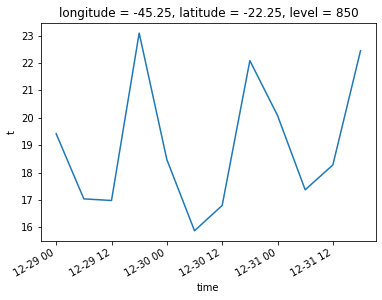

In [71]:
t.sel(longitude=-45.2, latitude=-22.3, method='nearest').isel(level=2).plot()


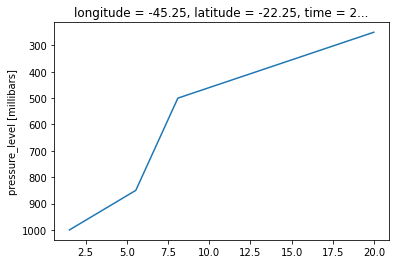

In [72]:
wspd.isel(time=0).sel(longitude=-45.2, latitude=-22.3, method='nearest').plot(y='level', 
                                                                              yincrease=False)

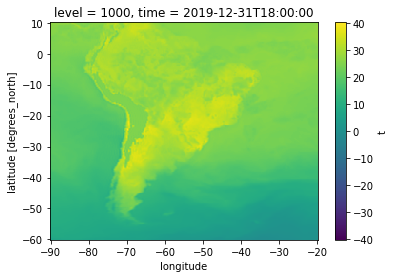

In [73]:
t.sel(time='2019-12-31T18:00:00').isel(level=3).plot(cmap='viridis')

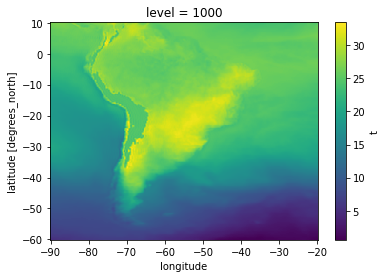

In [74]:
t.sel(level=1000).mean(dim='time').plot()